In [16]:
import os

In [17]:
image_data_dir = os.path.join("Dataset", "Image_Data")
eth_data_dir = os.path.join("Dataset", "Ethnicity_Dataset")

In [19]:
import pandas as pd
df = pd.read_csv('Dataset/Attribute_Data/london_faces_info.csv')
df.head()

,face_id,face_age,face_gender,face_eth
0,1,24.0,female,white
1,2,24.0,female,white
2,3,38.0,female,white
3,4,30.0,male,white
4,5,28.0,male,east_asian


In [20]:
import math
def isnan(value):
    try:
        return math.isnan(float(value))
    except:
        return False

In [ ]:
import numpy as np
import shutil

for person_no in range(1, 103):
    print('Transferring files for person ', person_no, ' ...')
    eth = df.iloc[person_no-1]['face_eth']
    if not isnan(eth):
        folder_path = os.path.join(eth_data_dir, eth)
        src_path_dir = os.path.join(image_data_dir, str(person_no))
        if not os.path.exists(folder_path):
            os.mkdir(folder_path)
        for file in os.listdir(src_path_dir):
            src = os.path.join(src_path_dir, file)
            dest = os.path.join(folder_path, file)
            if not os.path.exists(dest):
                shutil.copy(src, dest)

In [21]:
import tensorflow as tf
img_height,img_width=256,256
batch_size=16
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  eth_data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2040 files belonging to 4 classes.
Using 1632 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  eth_data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2040 files belonging to 4 classes.
Using 204 files for validation.


In [23]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  eth_data_dir,
  validation_split=0.1,
  subset="validation",
  seed=1,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2040 files belonging to 4 classes.
Using 204 files for validation.


In [24]:
classnames = train_ds.class_names

In [25]:
classnames

['black', 'east_asian', 'west_asian', 'white']

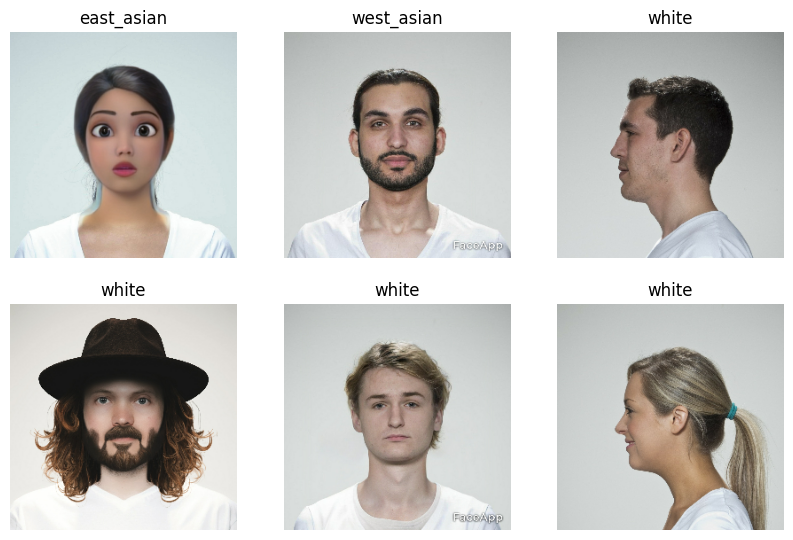

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classnames[np.argmax(labels[i])])
    plt.axis("off")

In [15]:
model = tf.keras.models.load_model('weights/action.h5', compile=False)
dense_output_model = tf.keras.models.Model(inputs=model.input, outputs=model.layers[-2].output)
dense_output_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50_input (InputLayer)  [(None, 256, 256, 3)]    0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 inception-resnet-v1 (Functi  (None, 1, 1, 2048)       1281536   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
Total params: 24,869,248
Trainable params: 1,280,512
Non-trainable params: 23,588,736
_________________________________________________________________


In [14]:
ethnicities = classnames

In [27]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D, PReLU, Dropout

eth_model = Sequential()
eth_model.add(dense_output_model)
eth_model.add(Dense(len(classnames), activation='softmax'))

In [28]:
eth_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2048)              24869248  
                                                                 
 dense_2 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 24,877,444
Trainable params: 1,288,708
Non-trainable params: 23,588,736
_________________________________________________________________


In [29]:
eth_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
epochs = 4
history = eth_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/4
102/102 [==============================] - 264s 3s/step - loss: 0.2642 - accuracy: 0.9105 - val_loss: 0.1419 - val_accuracy: 0.9657
Epoch 2/4
102/102 [==============================] - 254s 2s/step - loss: 0.1235 - accuracy: 0.9547 - val_loss: 0.0842 - val_accuracy: 0.9755
Epoch 3/4
102/102 [==============================] - 272s 3s/step - loss: 0.1059 - accuracy: 0.9608 - val_loss: 0.3749 - val_accuracy: 0.9167
Epoch 4/4
102/102 [==============================] - 257s 2s/step - loss: 0.0690 - accuracy: 0.9755 - val_loss: 0.3679 - val_accuracy: 0.9314


In [31]:
test_loss, test_accuracy = eth_model.evaluate(test_ds)

13/13 [==============================] - 28s 2s/step - loss: 0.1158 - accuracy: 0.9706


In [32]:
test_accuracy

0.970588207244873

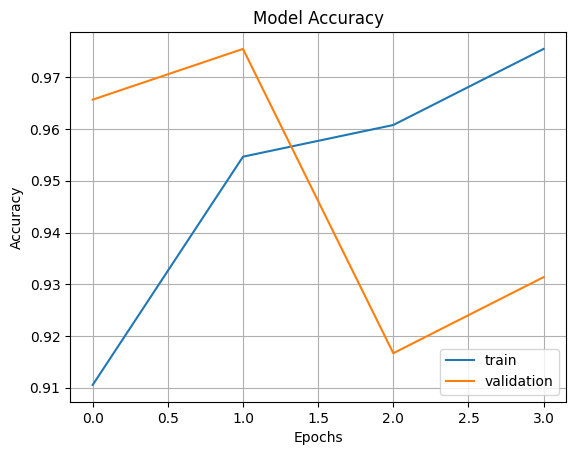

In [33]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
#plt.savefig('model_accuracy_rf.pdf', dpi = 700)

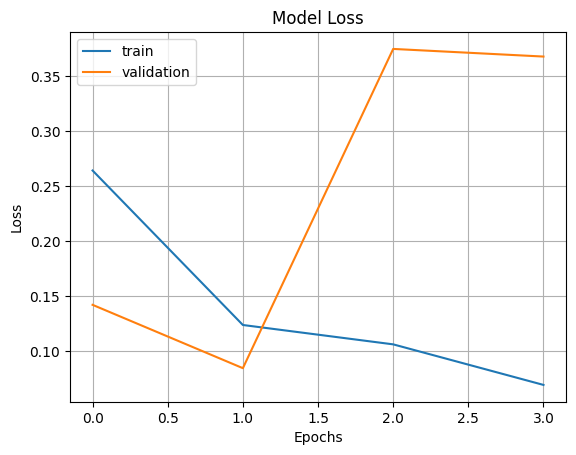

In [34]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
#plt.savefig('model_loss_rf.pdf', dpi = 700)

In [36]:
eth_model.save("weights/action_eth.h5")

In [11]:
eth_model = tf.keras.models.load_model('weights/action_eth.h5')

In [12]:
import cv2

In [15]:
eth_baseline, eth_filters, filter_no_list,  = [], [], []
mispredictions = {'black': {'east_asian':{}, 'west_asian': {}, 'white':{}},
                  'east_asian': {'black':{}, 'west_asian': {}, 'white':{}}, 
                  'west_asian': {'east_asian':{}, 'black': {}, 'white':{}},
                  'white': {'east_asian':{}, 'west_asian': {}, 'black':{}}}

for person_no in range(1, 103):
    person_dir = os.path.join(image_data_dir, str(person_no))
    img_path = os.path.join(person_dir, "{}_Original.jpg".format(person_no))
    img = cv2.imread(img_path)
    image_resized = cv2.resize(img, (img_height, img_width))
    image = np.expand_dims(image_resized, axis=0)
    print('Calculating ethnicity for baseline image of person ', person_no, '...')
    pred = eth_model.predict(image)
    baseline_eth_pred = ethnicities[np.argmax(pred)]
    
    for filter_no in range(1, 11):
        img_path = os.path.join(person_dir, "{}_Filtered_{}.jpg".format(person_no, filter_no))
        img = cv2.imread(img_path)
        image_resized = cv2.resize(img, (img_height, img_width))
        image = np.expand_dims(image_resized, axis=0)
        
        print('Calculating ethnicity for filter ', filter_no,' for person ', person_no, '...')
        pred = eth_model.predict(image)
        filtered_eth_pred = ethnicities[np.argmax(pred)]
        actual_eth = df.iloc[person_no-1]['face_eth']
        print('actual eth: {}, predicted eth: {}'.format(actual_eth, filtered_eth_pred))
        
        if filtered_eth_pred != actual_eth:
            count = mispredictions[actual_eth][filtered_eth_pred].get("Filter_{}".format(filter_no), 0)
            mispredictions[actual_eth][filtered_eth_pred]["Filter_{}".format(filter_no)] = count+1
        
        eth_baseline.append(baseline_eth_pred)
        eth_filters.append(filtered_eth_pred)
        filter_no_list.append(filter_no)

Calculating ethnicity for baseline image of person  1 ...
Calculating ethnicity for filter  1  for person  1 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  2  for person  1 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  3  for person  1 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  4  for person  1 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  5  for person  1 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  6  for person  1 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  7  for person  1 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  8  for person  1 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  9  for person  1 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  10  for person  1 ...
actual eth: white, predicted et

actual eth: west_asian, predicted eth: white
Calculating ethnicity for baseline image of person  9 ...
Calculating ethnicity for filter  1  for person  9 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  2  for person  9 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  3  for person  9 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  4  for person  9 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  5  for person  9 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  6  for person  9 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  7  for person  9 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  8  for person  9 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  9  for person  9 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  10  for 

Calculating ethnicity for filter  1  for person  17 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  2  for person  17 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  3  for person  17 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  4  for person  17 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  5  for person  17 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  6  for person  17 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  7  for person  17 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  8  for person  17 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  9  for person  17 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  10  for person  17 ...
actual eth: white, predicted eth: white
Calculating ethnicity for baseline imag

actual eth: white, predicted eth: white
Calculating ethnicity for baseline image of person  25 ...
Calculating ethnicity for filter  1  for person  25 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  2  for person  25 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  3  for person  25 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  4  for person  25 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  5  for person  25 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  6  for person  25 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  7  for person  25 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  8  for person  25 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  9  for person  25 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  10 

actual eth: east_asian, predicted eth: white
Calculating ethnicity for filter  9  for person  32 ...
actual eth: east_asian, predicted eth: east_asian
Calculating ethnicity for filter  10  for person  32 ...
actual eth: east_asian, predicted eth: east_asian
Calculating ethnicity for baseline image of person  33 ...
Calculating ethnicity for filter  1  for person  33 ...
actual eth: west_asian, predicted eth: west_asian
Calculating ethnicity for filter  2  for person  33 ...
actual eth: west_asian, predicted eth: east_asian
Calculating ethnicity for filter  3  for person  33 ...
actual eth: west_asian, predicted eth: west_asian
Calculating ethnicity for filter  4  for person  33 ...
actual eth: west_asian, predicted eth: west_asian
Calculating ethnicity for filter  5  for person  33 ...
actual eth: west_asian, predicted eth: west_asian
Calculating ethnicity for filter  6  for person  33 ...
actual eth: west_asian, predicted eth: west_asian
Calculating ethnicity for filter  7  for person

actual eth: east_asian, predicted eth: east_asian
Calculating ethnicity for filter  7  for person  40 ...
actual eth: east_asian, predicted eth: east_asian
Calculating ethnicity for filter  8  for person  40 ...
actual eth: east_asian, predicted eth: white
Calculating ethnicity for filter  9  for person  40 ...
actual eth: east_asian, predicted eth: east_asian
Calculating ethnicity for filter  10  for person  40 ...
actual eth: east_asian, predicted eth: east_asian
Calculating ethnicity for baseline image of person  41 ...
Calculating ethnicity for filter  1  for person  41 ...
actual eth: black, predicted eth: west_asian
Calculating ethnicity for filter  2  for person  41 ...
actual eth: black, predicted eth: west_asian
Calculating ethnicity for filter  3  for person  41 ...
actual eth: black, predicted eth: black
Calculating ethnicity for filter  4  for person  41 ...
actual eth: black, predicted eth: west_asian
Calculating ethnicity for filter  5  for person  41 ...
actual eth: blac

actual eth: white, predicted eth: white
Calculating ethnicity for filter  4  for person  48 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  5  for person  48 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  6  for person  48 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  7  for person  48 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  8  for person  48 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  9  for person  48 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  10  for person  48 ...
actual eth: white, predicted eth: white
Calculating ethnicity for baseline image of person  49 ...
Calculating ethnicity for filter  1  for person  49 ...
actual eth: west_asian, predicted eth: west_asian
Calculating ethnicity for filter  2  for person  49 ...
actual eth: west_asian, predicted eth: west_asian
Calculating ethn

actual eth: white, predicted eth: white
Calculating ethnicity for filter  3  for person  56 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  4  for person  56 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  5  for person  56 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  6  for person  56 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  7  for person  56 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  8  for person  56 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  9  for person  56 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  10  for person  56 ...
actual eth: white, predicted eth: white
Calculating ethnicity for baseline image of person  57 ...
Calculating ethnicity for filter  1  for person  57 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  2 

actual eth: white, predicted eth: white
Calculating ethnicity for filter  3  for person  64 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  4  for person  64 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  5  for person  64 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  6  for person  64 ...
actual eth: white, predicted eth: east_asian
Calculating ethnicity for filter  7  for person  64 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  8  for person  64 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  9  for person  64 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  10  for person  64 ...
actual eth: white, predicted eth: white
Calculating ethnicity for baseline image of person  65 ...
Calculating ethnicity for filter  1  for person  65 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filte

actual eth: black, predicted eth: west_asian
Calculating ethnicity for filter  3  for person  72 ...
actual eth: black, predicted eth: black
Calculating ethnicity for filter  4  for person  72 ...
actual eth: black, predicted eth: west_asian
Calculating ethnicity for filter  5  for person  72 ...
actual eth: black, predicted eth: west_asian
Calculating ethnicity for filter  6  for person  72 ...
actual eth: black, predicted eth: west_asian
Calculating ethnicity for filter  7  for person  72 ...
actual eth: black, predicted eth: west_asian
Calculating ethnicity for filter  8  for person  72 ...
actual eth: black, predicted eth: east_asian
Calculating ethnicity for filter  9  for person  72 ...
actual eth: black, predicted eth: white
Calculating ethnicity for filter  10  for person  72 ...
actual eth: black, predicted eth: west_asian
Calculating ethnicity for baseline image of person  73 ...
Calculating ethnicity for filter  1  for person  73 ...
actual eth: west_asian, predicted eth: we

Calculating ethnicity for filter  1  for person  80 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  2  for person  80 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  3  for person  80 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  4  for person  80 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  5  for person  80 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  6  for person  80 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  7  for person  80 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  8  for person  80 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  9  for person  80 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  10  for person  80 ...
actual eth: white, predicted eth: white
Calculating ethnicity for baseline imag

actual eth: white, predicted eth: white
Calculating ethnicity for baseline image of person  88 ...
Calculating ethnicity for filter  1  for person  88 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  2  for person  88 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  3  for person  88 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  4  for person  88 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  5  for person  88 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  6  for person  88 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  7  for person  88 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  8  for person  88 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  9  for person  88 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  10 

actual eth: white, predicted eth: white
Calculating ethnicity for baseline image of person  96 ...
Calculating ethnicity for filter  1  for person  96 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  2  for person  96 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  3  for person  96 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  4  for person  96 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  5  for person  96 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  6  for person  96 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  7  for person  96 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  8  for person  96 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  9  for person  96 ...
actual eth: white, predicted eth: white
Calculating ethnicity for filter  10 

In [16]:
data_dict = {'face_id':[], 'filter_no':[], 'actual_ethnicity':[], 'predicted_ethnicity_baseline':[], 'predicted_ethnicity_filtered':[]}

In [17]:
persons = len(eth_baseline)/10
persons

102.0

In [18]:
for i in range(int(persons)):
    face_id = df.iloc[i]['face_id']
    for filter_no in range(1, 11):
        data_dict['face_id'].append(face_id)

In [19]:
data_dict['filter_no'] = filter_no_list
data_dict['predicted_ethnicity_baseline'] = eth_baseline
data_dict['predicted_ethnicity_filtered'] = eth_filters

In [20]:
for i in range(int(persons)):
    eth = df.iloc[i]['face_eth']
    for filter_no in range(1, 11):
        data_dict['actual_ethnicity'].append(eth)

In [21]:
len(data_dict['face_id']), len(data_dict['predicted_ethnicity_baseline'])

(1020, 1020)

In [22]:
df_eth = pd.DataFrame.from_dict(data_dict)
df_eth

,face_id,filter_no,actual_ethnicity,predicted_ethnicity_baseline,predicted_ethnicity_filtered
0,1,1,white,white,white
1,1,2,white,white,white
2,1,3,white,white,white
3,1,4,white,white,white
4,1,5,white,white,white
...,...,...,...,...,...
1015,173,6,white,white,white
1016,173,7,white,white,white
1017,173,8,white,white,white
1018,173,9,white,white,white


In [23]:
mispredictions

{'black': {'east_asian': {'Filter_4': 3,
   'Filter_10': 2,
   'Filter_2': 1,
   'Filter_6': 2,
   'Filter_9': 2,
   'Filter_8': 1,
   'Filter_1': 1,
   'Filter_7': 1},
  'west_asian': {'Filter_1': 3,
   'Filter_2': 8,
   'Filter_3': 1,
   'Filter_6': 7,
   'Filter_7': 5,
   'Filter_10': 4,
   'Filter_4': 5,
   'Filter_5': 2,
   'Filter_9': 2},
  'white': {'Filter_8': 11,
   'Filter_9': 2,
   'Filter_1': 3,
   'Filter_5': 2,
   'Filter_10': 1,
   'Filter_4': 1,
   'Filter_2': 1,
   'Filter_3': 1,
   'Filter_6': 1}},
 'east_asian': {'black': {},
  'west_asian': {},
  'white': {'Filter_4': 2,
   'Filter_8': 9,
   'Filter_3': 1,
   'Filter_5': 1,
   'Filter_1': 1}},
 'west_asian': {'east_asian': {'Filter_2': 1,
   'Filter_7': 1,
   'Filter_8': 1,
   'Filter_9': 1},
  'black': {},
  'white': {'Filter_1': 2,
   'Filter_8': 9,
   'Filter_9': 5,
   'Filter_10': 5,
   'Filter_3': 3,
   'Filter_4': 2,
   'Filter_5': 3,
   'Filter_2': 2,
   'Filter_6': 1,
   'Filter_7': 1}},
 'white': {'east_asi

In [24]:
import pickle
with open("Results/Numerical Analysis/eth_dict.pkl", "wb") as f:
    pickle.dump(df_eth, f)

In [2]:
import os
import pickle
if os.path.exists("Results/Numerical Analysis/eth_dict.pkl"):
    with open("Results/Numerical Analysis/eth_dict.pkl", "rb") as f:
        df_eth = pickle.load(f)

In [3]:
df_eth

,face_id,filter_no,actual_ethnicity,predicted_ethnicity_baseline,predicted_ethnicity_filtered
0,1,1,white,white,white
1,1,2,white,white,white
2,1,3,white,white,white
3,1,4,white,white,white
4,1,5,white,white,white
...,...,...,...,...,...
1015,173,6,white,white,white
1016,173,7,white,white,white
1017,173,8,white,white,white
1018,173,9,white,white,white


In [13]:
import pickle
with open("Results/Numerical Analysis/mispredictions_eth.pkl", "wb") as f:
    pickle.dump(mispredictions, f)

In [7]:
import numpy as np
eth_true = np.array(df_eth['actual_ethnicity'])
eth_pred = np.array(df_eth['predicted_ethnicity_filtered'])

In [9]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
(precision, recall, f1_score, _) = precision_recall_fscore_support(eth_true, eth_pred, average='macro')
accuracy = accuracy_score(eth_true, eth_pred)

In [10]:
accuracy, precision, recall, f1_score

(0.8323529411764706, 0.772697604514417, 0.7150863991081382, 0.7106864927516864)

In [14]:
if os.path.exists("Results/Numerical Analysis/mispredictions_eth.pkl"):
    with open("Results/Numerical Analysis/mispredictions_eth.pkl", "rb") as f:
        mispredictions = pickle.load(f)

In [15]:
mispredictions

{'black': {'east_asian': {'Filter_4': 3,
   'Filter_10': 2,
   'Filter_2': 1,
   'Filter_6': 2,
   'Filter_9': 2,
   'Filter_8': 1,
   'Filter_1': 1,
   'Filter_7': 1},
  'west_asian': {'Filter_1': 3,
   'Filter_2': 8,
   'Filter_3': 1,
   'Filter_6': 7,
   'Filter_7': 5,
   'Filter_10': 4,
   'Filter_4': 5,
   'Filter_5': 2,
   'Filter_9': 2},
  'white': {'Filter_8': 11,
   'Filter_9': 2,
   'Filter_1': 3,
   'Filter_5': 2,
   'Filter_10': 1,
   'Filter_4': 1,
   'Filter_2': 1,
   'Filter_3': 1,
   'Filter_6': 1}},
 'east_asian': {'black': {},
  'west_asian': {},
  'white': {'Filter_4': 2,
   'Filter_8': 9,
   'Filter_3': 1,
   'Filter_5': 1,
   'Filter_1': 1}},
 'west_asian': {'east_asian': {'Filter_2': 1,
   'Filter_7': 1,
   'Filter_8': 1,
   'Filter_9': 1},
  'black': {},
  'white': {'Filter_1': 2,
   'Filter_8': 9,
   'Filter_9': 5,
   'Filter_10': 5,
   'Filter_3': 3,
   'Filter_4': 2,
   'Filter_5': 3,
   'Filter_2': 2,
   'Filter_6': 1,
   'Filter_7': 1}},
 'white': {'east_asi